# Wine Portugal Machine Learning
## Vinho Verde- 
### $\color{red}{\text{Um vinho português especial}}$



 ## $\color{blue}{\text{INTRODUCTION}}$

##### Vinho Verde is a special wine here in Portugal. It originated in Minho, Portugal.  The name Vinho Verde was derived from the fact that the wine is young given that the wine is released only after three to six months after the grapes are harvested.  It has a slight fiz, which initially was a "wine fault" but shortly thereafter the wine producers realized that the consumers enjoyed this quality.  While Vinho Verde also comes in tinto, the wine is not your typical red wine. The dataset that we are working with is Vinho Verde, tinto.  It is a very popular dataset that seeks to determine the quality of a given sample after creating a model based on classifiers. In the following Notebook, we worked with this dataset by cleaning it, engaging in exploratory data and applying several classifiers to determine the highest accuracy for determining quality.  We sought to answer the question, "If given a random wine sample, not in the forementioned dataset, would our model classify it correctly?"  To that end, we created a baby dataset from an adega in the Alentejo.  We created a subset of the vinho verde dataset by looking at the most important features in determining quality and then obtained chemical caracteristics from the alentejo adega.  From there we were able to abstract the same four features from the alentejo dataset. We then split the subset vinho verde dataset in order to train it and test it.  It appeared to have an adequate accuracy rate.  Therefore we passed the alentejo dataset to determine the accuracy of predicting a typical portuguese red wine.  We found that the accuracy rate was:  

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import model_selection

## $\color{blue}{\text{EXPLORATORY DATA}}$

In [279]:
data = pd.read_csv(("C:/Users/faria/OneDrive/Desktop/Final Projeto Ana/winequality.csv"))
data.head() 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [281]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [282]:
data.shape


(1599, 12)

#### $\color{blue}{\text{DUPLICATES}}$


In [285]:
print("Number of duplicates in red wine: "+ str(np.sum(np.array(data.duplicated()))))


Number of duplicates in red wine: 240


We identified 240 duplicates but we did not drop these data points because it was creating errors and did not add much to the analysis.

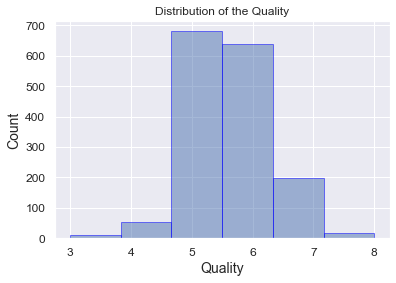

In [288]:
#no values below 3 or greater than 8- majority are between 5 and 6-if got rid of 5 and 6 could see bigger differences
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='blue') 
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [289]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)   

In [290]:
sns.set_style('white')
my_color = '#643db8'

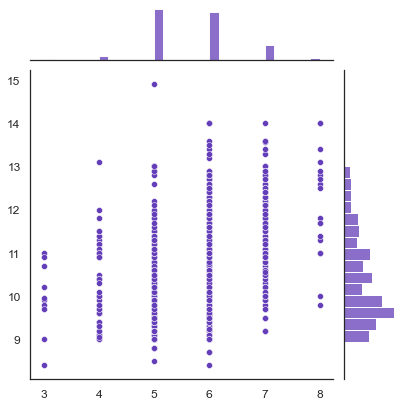

In [291]:
#  axis above you can see the distribution of the quality. Again majority is in bins 5 and 6. Inbalanced.
# Similary you can see the alcohol pretty much indicating the distribution of alcohol in this set
j = sns.jointplot(x='quality', y='alcohol', data=data, color=my_color)
j.ax_joint.set_xlabel('')
j.ax_joint.set_ylabel('');


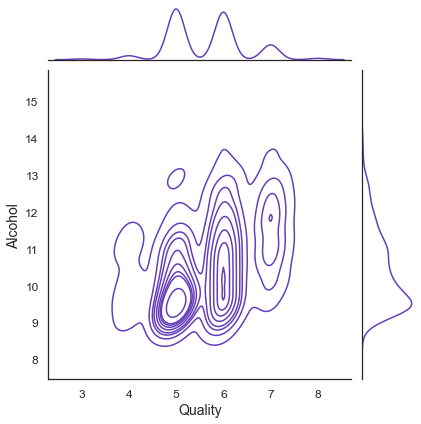

In [292]:
#here we have a kernal density estimation graph.  The KDE Plot is used for visualizing the prob density of a cont varaible.
#it depicts the prob density at diff values in a cont variable
#from here you can see that vinho verde is not a strong wine, that this set the experts only found the wine marginal


j = sns.jointplot(x='quality', y='alcohol', data=data, color=my_color, kind='kde')
j.ax_joint.set_xlabel('Quality')
j.ax_joint.set_ylabel('Alcohol');

In [293]:
#correlation matrix- you can see that alcohol and quality are highly correlated positively and volatile acidity is neg corr
data.corr() 

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

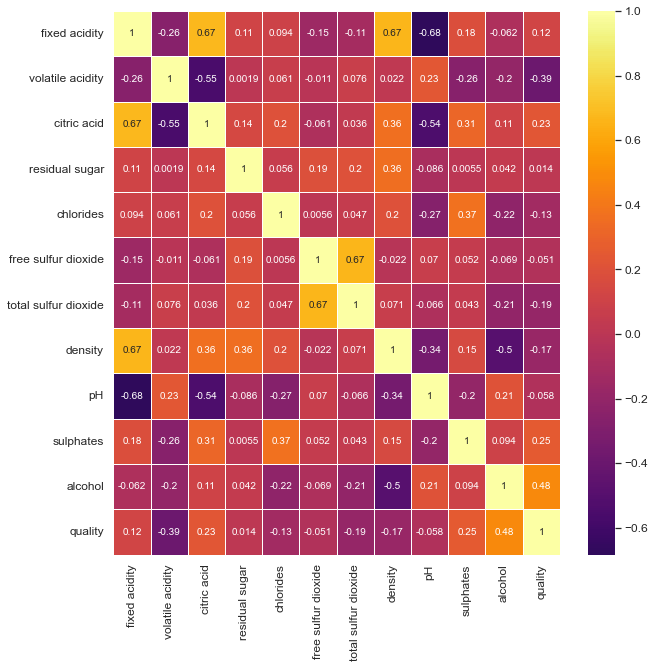

In [294]:
#a visulaization of the above
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='inferno')
plt.show()

In [295]:
#can see that alcohol has the greatest positive effect by separating out alcohol
# volatile acidity is neg correlated, sulphates +, citric acid +, total sulfur -, density -
data.corr()['quality']


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

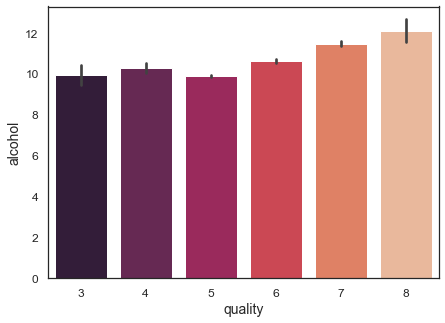

In [296]:
# the grade of 4 has more alcohol than 5, yet it is a lower rating therefore not exactly linear in terms of correlation
plt.figure(figsize=(7,5))
sns.barplot(data['quality'],data['alcohol'],palette="rocket")
plt.show()

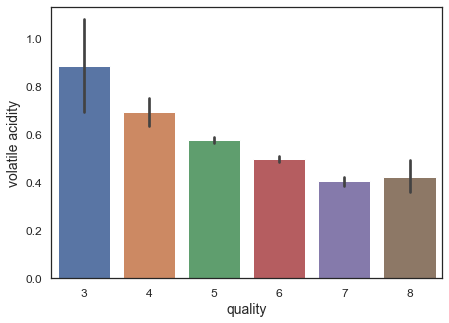

In [297]:
#very clear that the more volatile acidity the lower the quality-great indicator
plt.figure(figsize=(7,5)) 
sns.barplot(data['quality'],data['volatile acidity'],palette="deep")
plt.show()

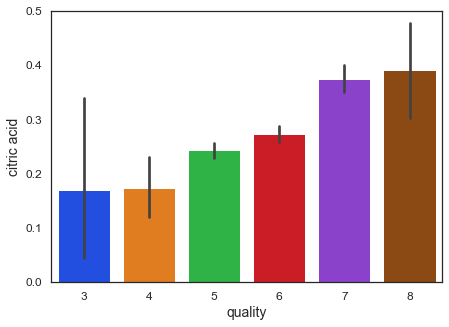

In [298]:
#seems like citric acid is a great indicator of good quality, but not as good as alcohol
plt.figure(figsize=(7,5)) 
sns.barplot(data['quality'],data['citric acid'],palette="bright")
plt.show()

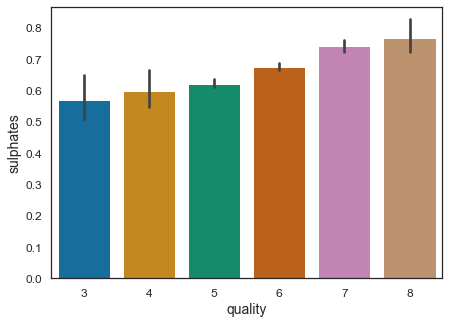

In [299]:
 #neg correlated but doesn't seem to have much effect
plt.figure(figsize=(7,5))
sns.barplot(data['quality'],data['sulphates'],palette="colorblind")
plt.show()

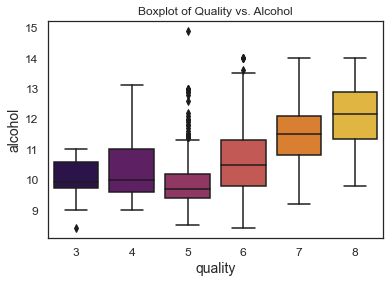

In [300]:
#we have some outliers in 5 and 6, where most of the wines land
sns.boxplot(x='quality',y='alcohol',data=data,palette='inferno')
plt.title("Boxplot of Quality vs. Alcohol")
plt.show()

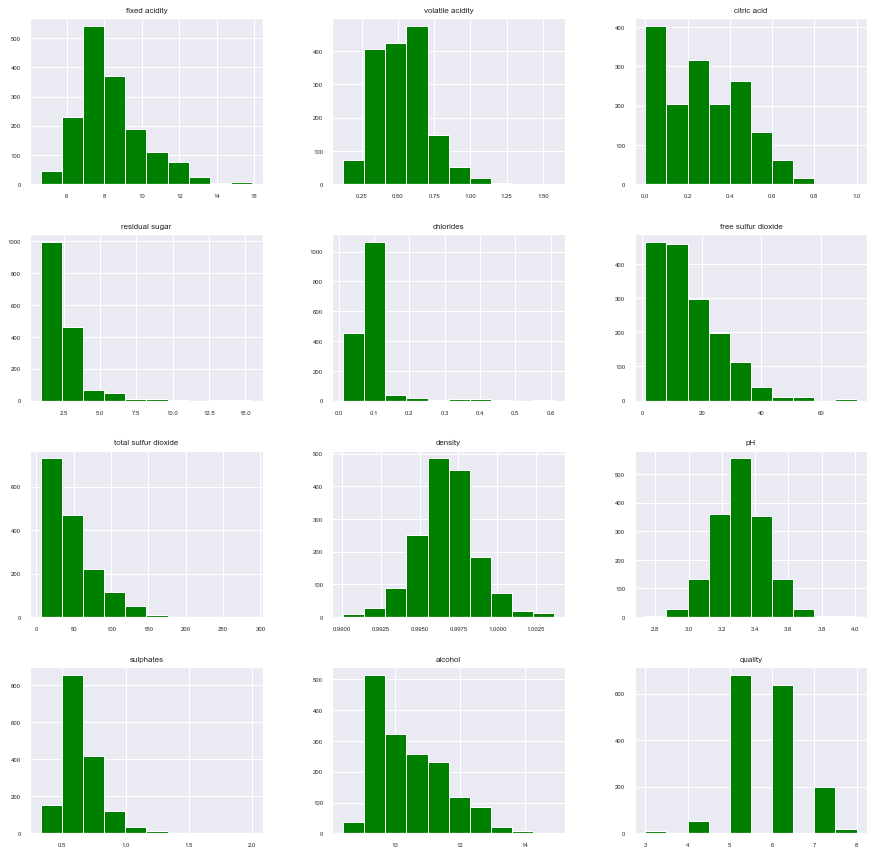

In [301]:
#range of the scales are large- consider scaling
sns.set()
fig = data.hist(figsize=(15,15), color='green', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

In [302]:
#gist of the wines fall in 5 and 6
# unbalanced data set- consider normalizing
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [303]:
#categorize wines as good or bad -> 0, 1
data['quality'] = np.where(data['quality'] > 6, 1, 0)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [304]:
#checking to make sure quality was either 0 or 1
data.head(8)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0  
5      9.4        0  
6      9.4        0  
7     10.0        1

<AxesSubplot:xlabel='quality', ylabel='count'>

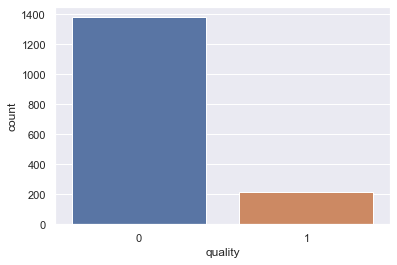

In [305]:
# Class Distribuition
sns.countplot(x="quality", data=data)


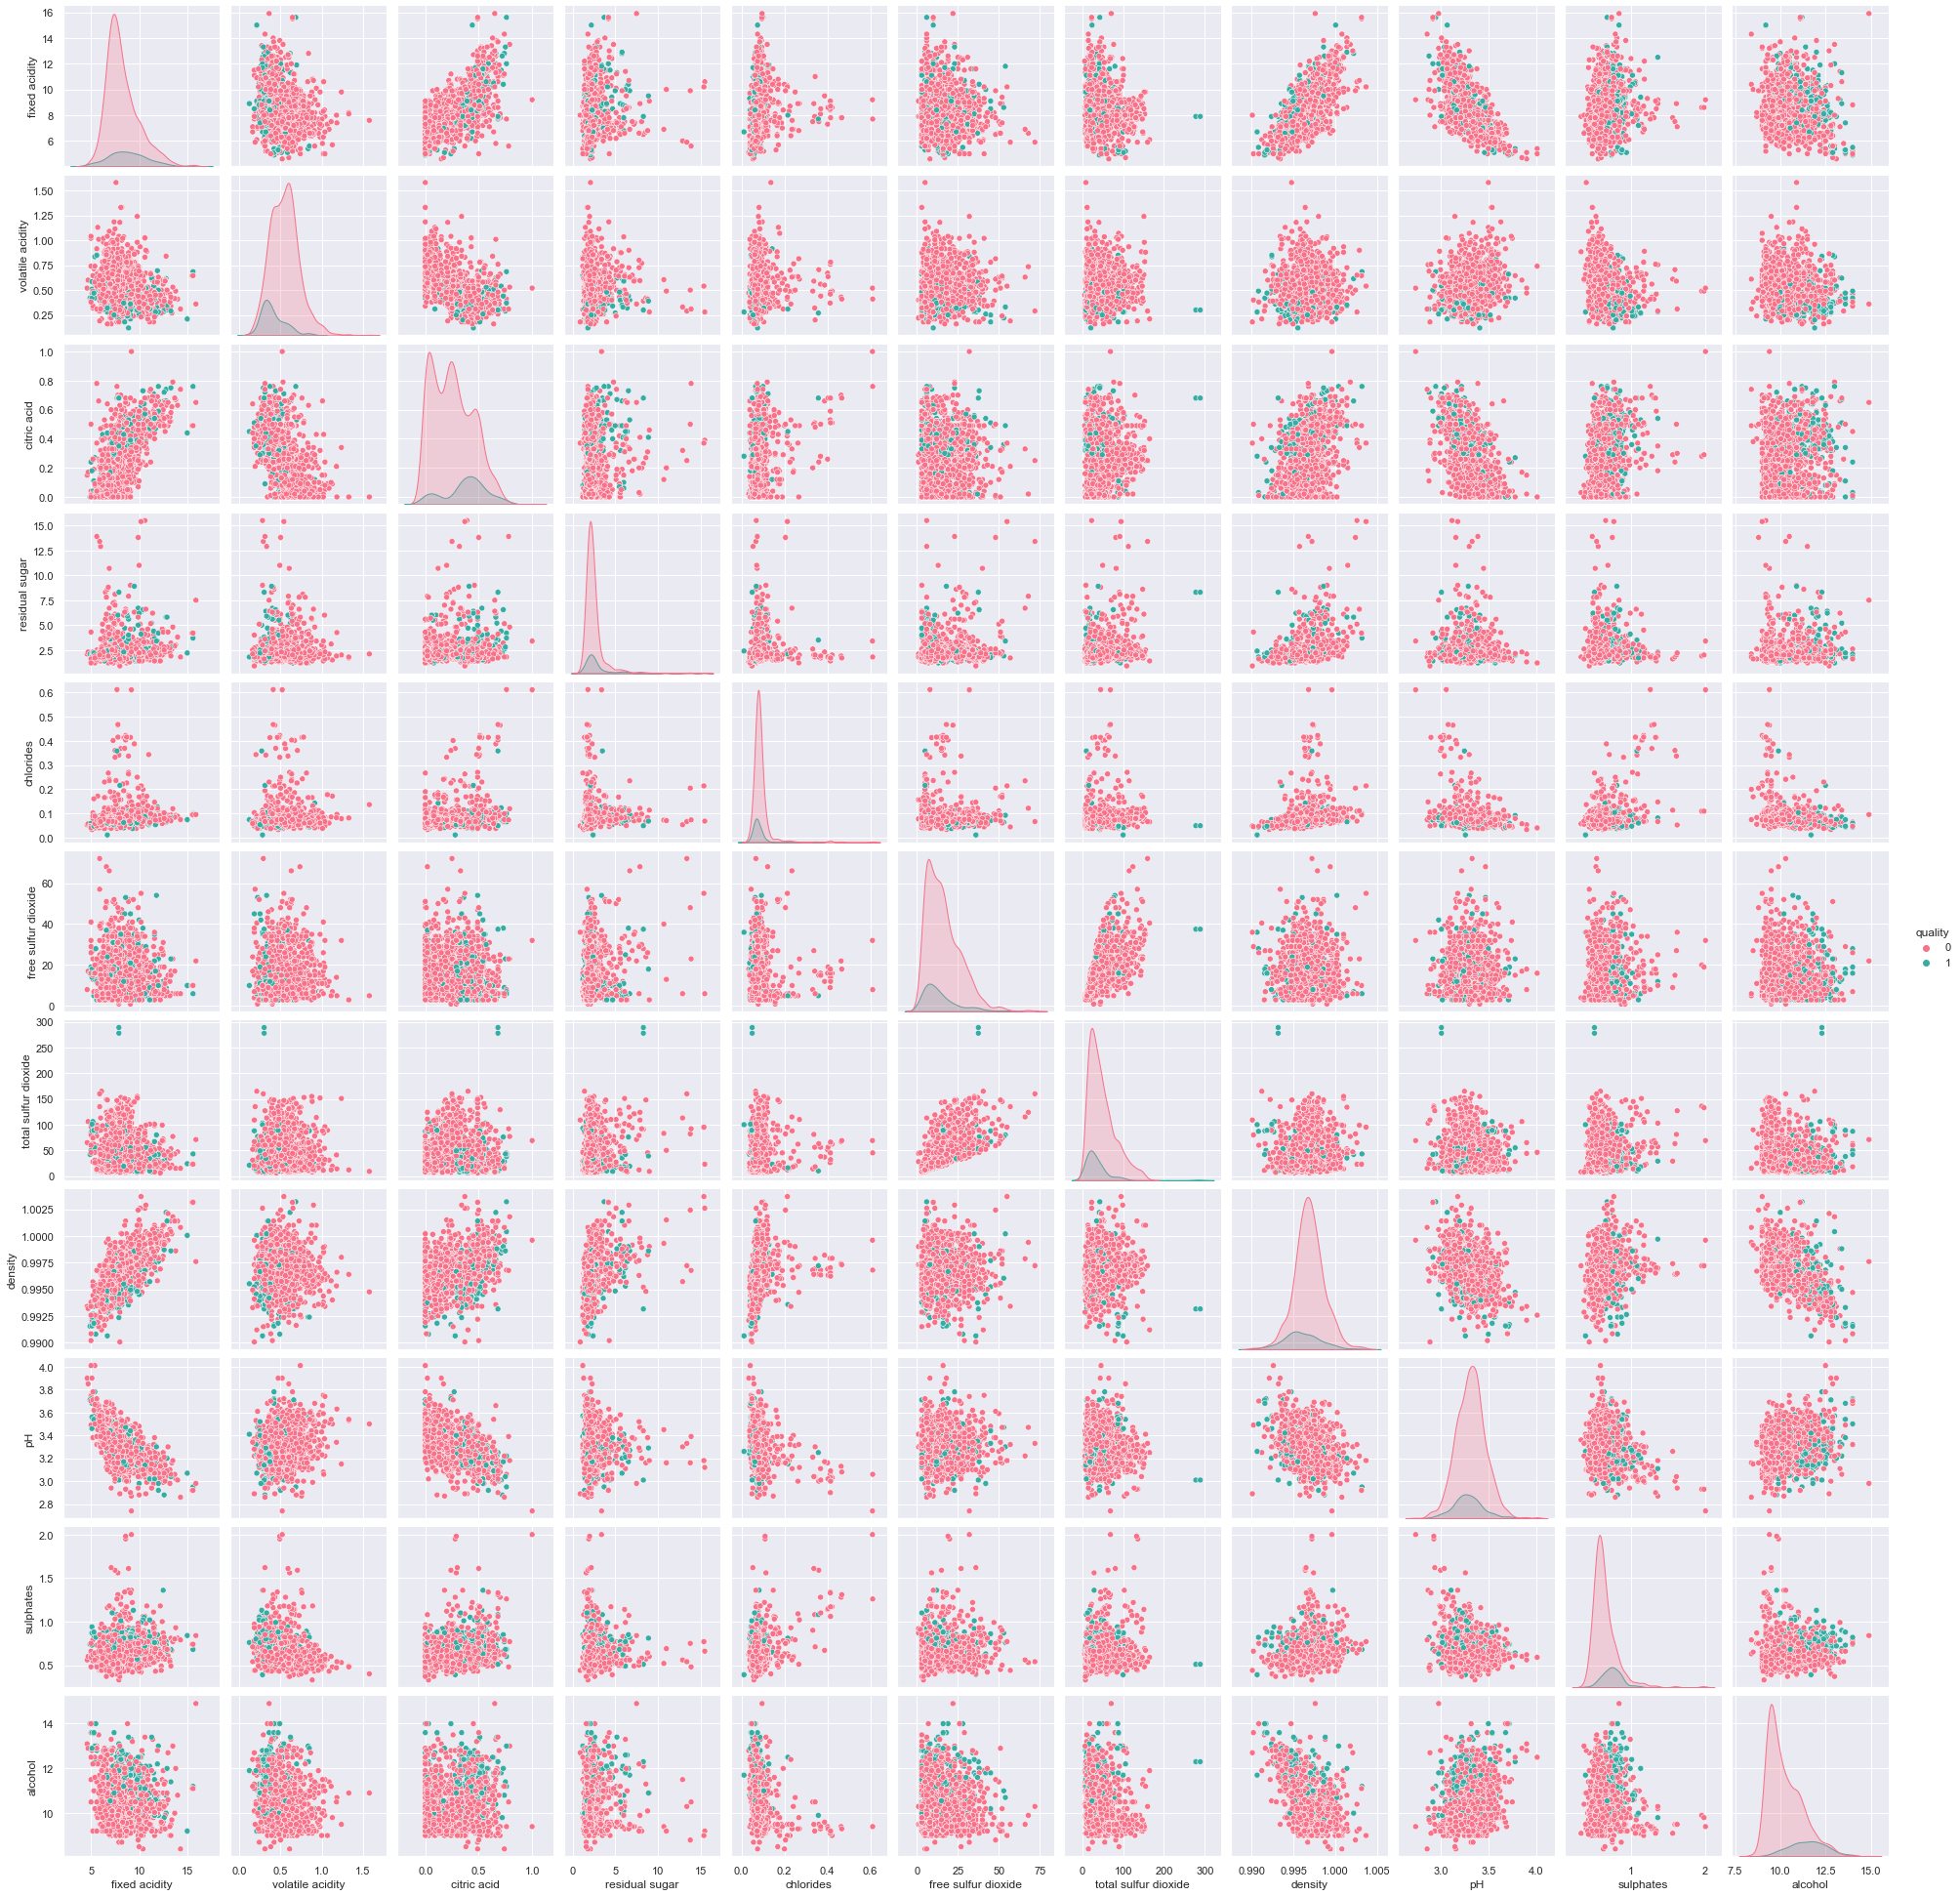

In [25]:
#here we have both continuous and categorical columns in our dataset
# main diagonal shows the distribution of a particular feature
#sns.pairplot(data=data, hue='quality')
# it is hard to get a good feel bc the dataset is very unbalanced
g = sns.pairplot(data,hue="quality",palette= "husl")
plt.show()

In [306]:
# Filtering df for only good quality to see the stats of the good wines

data_temp = data[data['quality']==1]
data_temp.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     217.000000        217.000000   217.000000      217.000000   
mean        8.847005          0.405530     0.376498        2.708756   
std         1.999977          0.144963     0.194438        1.363026   
min         4.900000          0.120000     0.000000        1.200000   
25%         7.400000          0.300000     0.300000        2.000000   
50%         8.700000          0.370000     0.400000        2.300000   
75%        10.100000          0.490000     0.490000        2.700000   
max        15.600000          0.915000     0.760000        8.900000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  217.000000           217.000000            217.000000  217.000000   
mean     0.075912            13.981567             34.889401    0.996030   
std      0.028480            10.234615             32.572238    0.002201   
min      0.012000             3.000000              7.000000    0.990640   
25%      0.062000             6.000000             17.000000    0.994700   
50%      0.073000            11.000000             27.000000    0.995720   
75%      0.085000            18.000000             43.000000    0.997350   
max      0.358000            54.000000            289.000000    1.003200   

               pH   sulphates     alcohol  quality  
count  217.000000  217.000000  217.000000    217.0  
mean     3.288802    0.743456   11.518049      1.0  
std      0.154478    0.134038    0.998153      0.0  
min      2.880000    0.390000    9.200000      1.0  
25%      3.200000    0.650000   10.800000      1.0  
50%      3.270000    0.740000   11.600000      1.0  
75%      3.380000    0.820000   12.200000      1.0  
max      3.780000    1.360000   14.000000      1.0

In [307]:
# Filtering df for only bad quality
data_temp2 = data[data['quality']==0]
data_temp2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1382.000000       1382.000000  1382.000000     1382.000000   
mean        8.236831          0.547022     0.254407        2.512120   
std         1.682726          0.176337     0.189665        1.415778   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.420000     0.082500        1.900000   
50%         7.800000          0.540000     0.240000        2.200000   
75%         9.100000          0.650000     0.400000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1382.000000          1382.000000           1382.000000  1382.000000   
mean      0.089281            16.172214             48.285818     0.996859   
std       0.049113            10.467685             32.585604     0.001808   
min       0.034000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995785   
50%       0.080000            14.000000             39.500000     0.996800   
75%       0.091000            22.000000             65.000000     0.997900   
max       0.611000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol  quality  
count  1382.000000  1382.000000  1382.000000   1382.0  
mean      3.314616     0.644754    10.251037      0.0  
std       0.154135     0.170629     0.969664      0.0  
min       2.740000     0.330000     8.400000      0.0  
25%       3.210000     0.540000     9.500000      0.0  
50%       3.310000     0.600000    10.000000      0.0  
75%       3.410000     0.700000    10.900000      0.0  
max       4.010000     2.000000    14.900000      0.0

In [308]:
# medians
#from here you can really see the deciding factors in determining the quality of the wine
#we have the means of each of the features wrt to bad and good wine
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data_pivot_table_mean = data.pivot_table(colum_names,['quality'], aggfunc='median')

data_pivot_table_mean

alcohol  chlorides  citric acid  density  fixed acidity  \
quality                                                            
0           10.0      0.080         0.24  0.99680            7.8   
1           11.6      0.073         0.40  0.99572            8.7   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
0                       14.0  3.31             2.2       0.60   
1                       11.0  3.27             2.3       0.74   

         total sulfur dioxide  volatile acidity  
quality                                          
0                        39.5              0.54  
1                        27.0              0.37

In [309]:
#standard deviation 
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data_pivot_table_std = data.pivot_table(colum_names,['quality'], aggfunc='std')
#data_pivot_table_mean.iloc[0].to_numpy(),data_pivot_table_mean.iloc[0].to_numpy()- this created an array of the mean of the features bad wine
#an array of all the std deviations of the features wrt to the bad wine:
#data_pivot_table_std.iloc[0].to_numpy(),data_pivot_table_std.iloc[1].to_numpy()
data_pivot_table_std

alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                              
0        0.969664   0.049113     0.189665  0.001808       1.682726   
1        0.998153   0.028480     0.194438  0.002201       1.999977   

         free sulfur dioxide        pH  residual sugar  sulphates  \
quality                                                             
0                  10.467685  0.154135        1.415778   0.170629   
1                  10.234615  0.154478        1.363026   0.134038   

         total sulfur dioxide  volatile acidity  
quality                                          
0                   32.585604          0.176337  
1                   32.572238          0.144963

feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## $\color{blue}{\text{CLASSIFIERS}}$

### $\color{purple}{\text{SPLIT THE DATA FOR TESTING}}$

In [310]:
#Split the data

X = data.drop(['quality'], axis = 1)
y = data['quality']

In [311]:
X.shape


(1599, 11)

In [312]:
#random_state #42
#stratify the data because very unbalanced
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1599)

##### $\color{purple}{\text{Stratified kfold cross validation is typically useful when we have imbalanced data and where the data size is on the small side. Sometimes we will over or under sample our data to deal with class imbalance but other times we want to maintain the class imbalance when it’s representative of or contains some information about what we are trying to classify.}}$

In [313]:
from sklearn.model_selection import StratifiedKFold

In [314]:
# want to use this bc our dataset is unbalanced
# look at ratio: as you can see only 13.6% of the wines are good
print('Class Ratio:',
sum(data['quality'])/len(data['quality']))

Class Ratio: 0.1357098186366479


In [315]:
#When we create our folds we want each split to have this same percentage of returns ie. 13.6%
skf = StratifiedKFold(n_splits=5)

In [316]:
target = data.loc[:,'quality']

In [317]:
#You can see that each fold’s class ratio is close to the full data set which is obviously what we want.
fold_no = 1
for train_index, test_index in skf.split(data, target):
    train = data.loc[train_index,:]
    test = data.loc[test_index,:]
    print('Fold',str(fold_no),
          'Class Ratio:',
          sum(test['quality'])/len(test['quality']))
    fold_no += 1

Fold 1 Class Ratio: 0.134375
Fold 2 Class Ratio: 0.134375
Fold 3 Class Ratio: 0.1375
Fold 4 Class Ratio: 0.1375
Fold 5 Class Ratio: 0.13479623824451412


## $\color{purple}{\text{SMOTE }}$ 


In [318]:
#apply SMOTE since we have unbalanced dataset 
from imblearn.over_sampling import SMOTE

In [319]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='quality'>

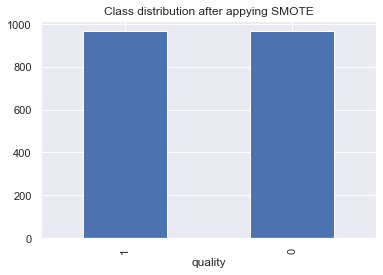

In [320]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='quality')


 ### $\color{purple}{\text{ACCURACY OF THE CLASSIFIERS}}$

SupportVectorClassifier: 0.865927 (0.017632)
RandomForestClassifier: 0.907054 (0.019669)
DecisionTreeClassifier: 0.862355 (0.033320)
GaussianNB: 0.848962 (0.026074)
KNeighborsClassifier: 0.847161 (0.024610)
LogisticRegression: 0.874879 (0.021183)
LDA: 0.865935 (0.015627)
QDA: 0.852534 (0.016222)


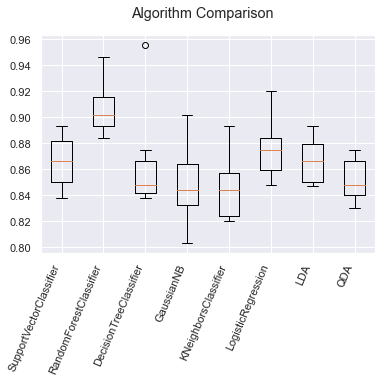

In [463]:
#you can see random forest has the best accuracy.  Note that the accuracy only went down a little after SMOTE
#SupportVectorClassifier: 0.865927 (0.017632)
#RandomForestClassifier: 0.910626 (0.012048)
#DecisionTreeClassifier: 0.864133 (0.041006)
#GaussianNB: 0.848962 (0.026074)
#KNeighborsClassifier: 0.847161 (0.024610)
#LogisticRegression: 0.875780 (0.020543)
#seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))


# evaluate each model in turn using k fold. should we use the strat instead
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state = None )
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=67, horizontalalignment='right') #alteração-rotation -Xticklabels no longer overlap!
plt.show()

 ### $\color{purple}{\text{ROADMAP}}$
#### $\color{purple}{\text{For each classifier we will show the following:}}$
##### $\color{purple}{\text{We will fit the model, run a prediction, show the accuracy score, confusion matrix, train the model to obtain recall and f1-score and CV}}$

## $\color{blue}{\text{LDA}}$
#### LDA is most commonly used as dimensionality reduction technique in the preprocessing step for classification, with a goal to project a dataset onto a lower-dimensional space with good class separability. It also can be used separately as a classifier. In short, the goal of an LDA is to project a feature space (a dataset n-dim samples) onto a smaller subspace k (where k <= n-1) while maintaining the class-discrim information.
https://sebastianraschka.com/Articles/2014_python_lda.html

In [322]:
#LDA
lda = LinearDiscriminantAnalysis()

# fit the model
lda.fit(X_train, y_train.ravel())

# prediction
predictions_lda = lda.predict(X_test)


acc_lda = accuracy_score(y_test,predictions_lda)
print(acc_lda)

print(confusion_matrix(y_test,predictions_lda))


0.8854166666666666
[[398  17]
 [ 38  27]]


## Before Smote
###    precision    recall  f1-score   support

           0       0.91      0.96      0.94       415
           1       0.61      0.42      0.50        65

    accuracy                           0.89       480
   macro avg       0.76      0.69      0.72       480
weighted avg       0.87      0.89      0.88       480*

In [323]:
# train the model on train set
# you can see that the f-score is only 50%.
#while the accuracy is great, we such an unbalanced data set (1382 bad, 217 good) that the accuracy score does not mean much

lda.fit(X_train, y_train)
print(classification_report(y_test, predictions_lda))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       415
           1       0.61      0.42      0.50        65

    accuracy                           0.89       480
   macro avg       0.76      0.69      0.72       480
weighted avg       0.87      0.89      0.88       480



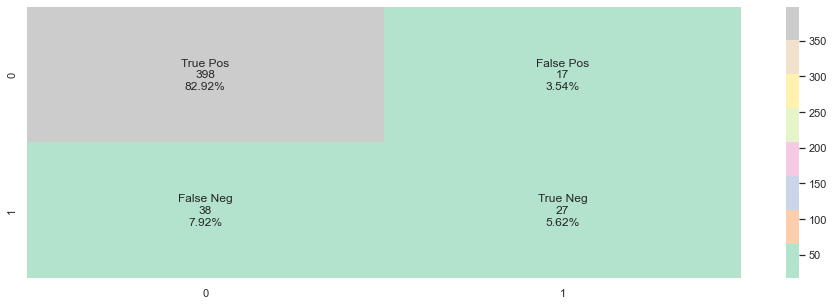

In [324]:
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_lda)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Pastel2');

In [325]:
#LDA + CV
#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_lda = cross_val_score(lda, X, y, cv=10)

#cv scores (accuracy) and their average
print(cv_scores_lda)
print('cv_scores mean:{}'.format(np.mean(cv_scores_lda)))

[0.85625    0.8875     0.8625     0.89375    0.88125    0.9125
 0.8        0.8625     0.89375    0.87421384]
cv_scores mean:0.8724213836477986


## $\color{blue}{\text{SUPPORT VECTOR CLASSIFIER}}$


In [326]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [327]:
# Before smote 0.8645833333333334
#[[415   0]
# [ 65   0]]
#train the model on train set
#predicted 87% of the bad wines correctly and 100% of the good wines correctly
#true positive 1, true negative 415, false positive 0, false negativ 64
svc = SVC()
svc.fit(X_train, y_train.ravel())
 
predictions_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test,predictions_svc)
print(acc_svc)

print(confusion_matrix(y_test,predictions_svc))

0.8645833333333334
[[415   0]
 [ 65   0]]


In [328]:
# train the model on train set
svc.fit(X_train, y_train) 
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       415
           1       0.00      0.00      0.00        65

    accuracy                           0.86       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.75      0.86      0.80       480



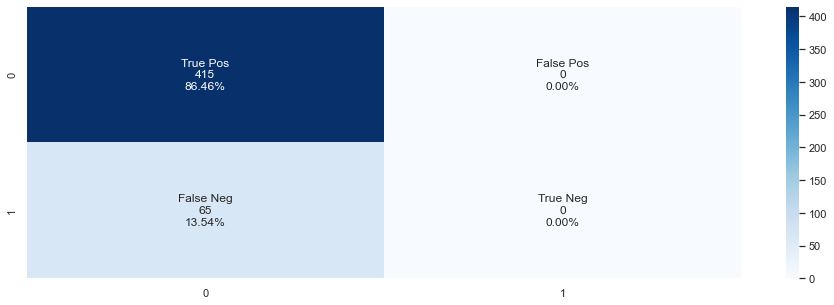

In [329]:
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_svc)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');


In [330]:
#SVC + CV

#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_svc = cross_val_score(svc, X, y, cv=5)

#cv scores (accuracy) and their average
print(cv_scores_svc)
print('cv_scores mean:{}'.format(np.mean(cv_scores_svc)))

[0.865625   0.865625   0.8625     0.8625     0.86520376]
cv_scores mean:0.8642907523510971


## $\color{blue}{\text{KNN}}$



In [337]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8854166666666666 Best K-Score 31


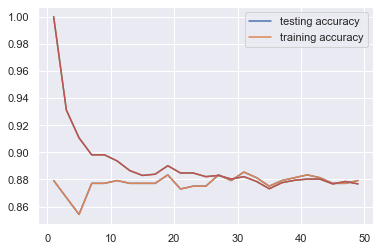

In [338]:
#A large K value has benefits which include reducing the variance due to the noisy data, the side effect being developing a bias due to which the learner tends to ignore the smaller patterns which may have useful insights. The data indicates underfitting.
#here you can see that k=6 is the favored choice as it appears to be where they come together, even though k=3 has best accuracy 
sns.lineplot(k, testing_accuracy)
sns.lineplot(k, testing_accuracy)

sns.lineplot(k, training_accuracy)
sns.lineplot(k, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])

In [339]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
 
predictions_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test,predictions_knn)
print(acc_knn)

print(confusion_matrix(y_test,predictions_knn))

0.8770833333333333
[[406   9]
 [ 50  15]]


In [340]:
# train the model on train set
knn.fit(X_train, y_train) 
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       415
           1       0.62      0.23      0.34        65

    accuracy                           0.88       480
   macro avg       0.76      0.60      0.63       480
weighted avg       0.85      0.88      0.85       480



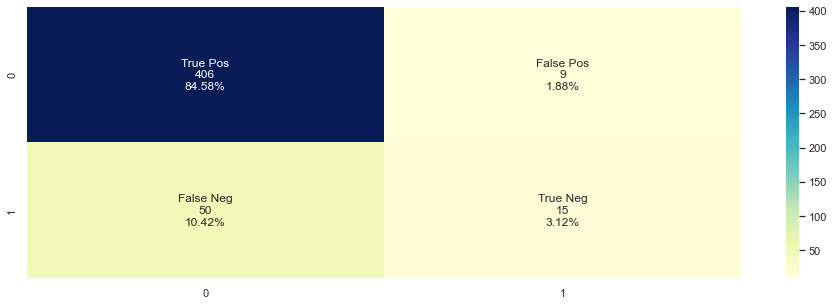

In [341]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_knn)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='YlGnBu');


In [342]:
#define model
knn = KNeighborsClassifier(n_neighbors = 6)
pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=6))])

In [343]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 10)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

pipe_knn_cv = model_evaluation(pipe_knn, 'roc_auc')

score_mean = [pipe_knn_cv.mean()]
score_std = [pipe_knn_cv.std()]
score_roc_auc = [roc_auc_score(y_test, pipe_knn.predict(X_test))]
method_name = ['K-Neighbors Classifier']
summary = pd.DataFrame({'method': method_name, 'mean score': score_mean,
                        'std score': score_std, 'roc auc score': score_roc_auc})
summary

method  mean score  std score  roc auc score
0  K-Neighbors Classifier    0.818025   0.043244       0.641057

In [344]:
knn.score(X_train, y_train)

0.8632707774798928

In [345]:
#more or less the same
knn.score(X_test, y_test)

0.8645833333333334

## $\color{blue}{\text{NAIVE BAYES}}$

In [348]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
 
predictions_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,predictions_gnb)
print(acc_gnb)

print(confusion_matrix(y_test,predictions_gnb))


0.8583333333333333
[[369  46]
 [ 22  43]]


In [349]:
# train the model on train set
#has the highest f-1 score
gnb.fit(X_train, y_train) 
print(classification_report(y_test, predictions_gnb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       415
           1       0.48      0.66      0.56        65

    accuracy                           0.86       480
   macro avg       0.71      0.78      0.74       480
weighted avg       0.88      0.86      0.87       480



In [350]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8583


In [351]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8499


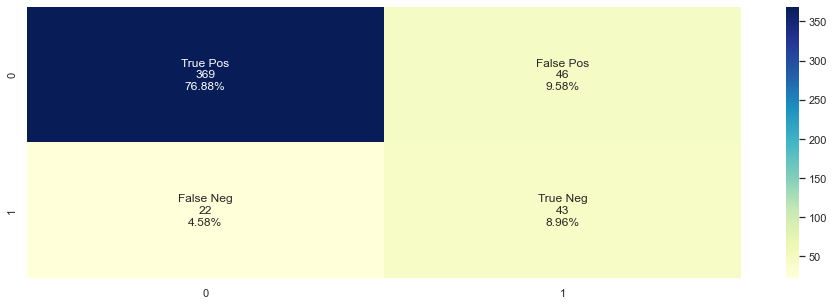

In [352]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_gnb)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='YlGnBu');


In [353]:
#GNB + CV

#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_gnb = cross_val_score(gnb, X, y, cv=5)

#cv scores (accuracy) and their average
print(cv_scores_gnb)
print('cv_scores mean:{}'.format(np.mean(cv_scores_gnb)))

[0.871875   0.69375    0.896875   0.703125   0.86833856]
cv_scores mean:0.8067927115987461


## $\color{blue}{\text{DECISION TREE}}$

In [354]:
# Creating a dictionary of parameters to use in GridSearchCV
#even though these parameters are labeled as the best parameters, 
# this is in the context of the parameter combinations that we passed in. There could, theoretically, be better parameters.
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6, 'splitter': 'best'}


In [355]:
#Decission Trees
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
     
    criterion='gini', 
    splitter='best', 
    max_depth=6, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)


DecisionTreeClassifier(max_depth=6)

In [356]:
#choose max depth 6 as stated above, max features 0.4- all increased the score by 2%
dtc = DecisionTreeClassifier(
     
    criterion='gini', 
    splitter='best', 
    max_depth=6, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=0.4, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

dtc.fit(X_train, y_train.ravel())
predictions_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test,predictions_dtc)
print(acc_dtc)
print(confusion_matrix(y_test,predictions_dtc))


0.8666666666666667
[[388  27]
 [ 37  28]]


In [357]:
# train the model on train set
#this is the second highest f1-score
dtc.fit(X_train, y_train) 
print(classification_report(y_test, predictions_dtc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       415
           1       0.51      0.43      0.47        65

    accuracy                           0.87       480
   macro avg       0.71      0.68      0.70       480
weighted avg       0.86      0.87      0.86       480



In [358]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9000


In [359]:
y_pred_train = dtc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9366


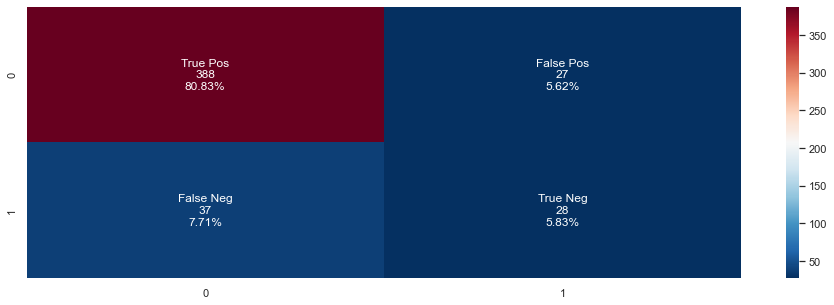

In [360]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_dtc)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='RdBu_r');

In [382]:
from sklearn.tree import DecisionTreeRegressor #alteração
from sklearn import tree

In [383]:
regr = DecisionTreeRegressor(max_depth=6, random_state=None) #alteração
model = regr.fit(X, y)

In [384]:
text_representation = tree.export_text(regr) #alteração
print(text_representation)

|--- feature_10 <= 11.55
|   |--- feature_1 <= 0.38
|   |   |--- feature_10 <= 10.45
|   |   |   |--- feature_0 <= 11.70
|   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |--- feature_9 <= 1.07
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- feature_9 >  1.07
|   |   |   |   |   |   |--- value: [0.40]
|   |   |   |--- feature_0 >  11.70
|   |   |   |   |--- feature_3 <= 2.35
|   |   |   |   |   |--- feature_2 <= 0.73
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_2 >  0.73
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_3 >  2.35
|   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_10 >  10.45
|   |   |   |--- feature_8 <= 3.26
|   |   |   |   |--- feature_3 <= 2.95
|   |   |   |   |   |--- feature_9 <= 0.57
|   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |--- feature_9 >  0.57
|   |   |   |   |   |   |--- 

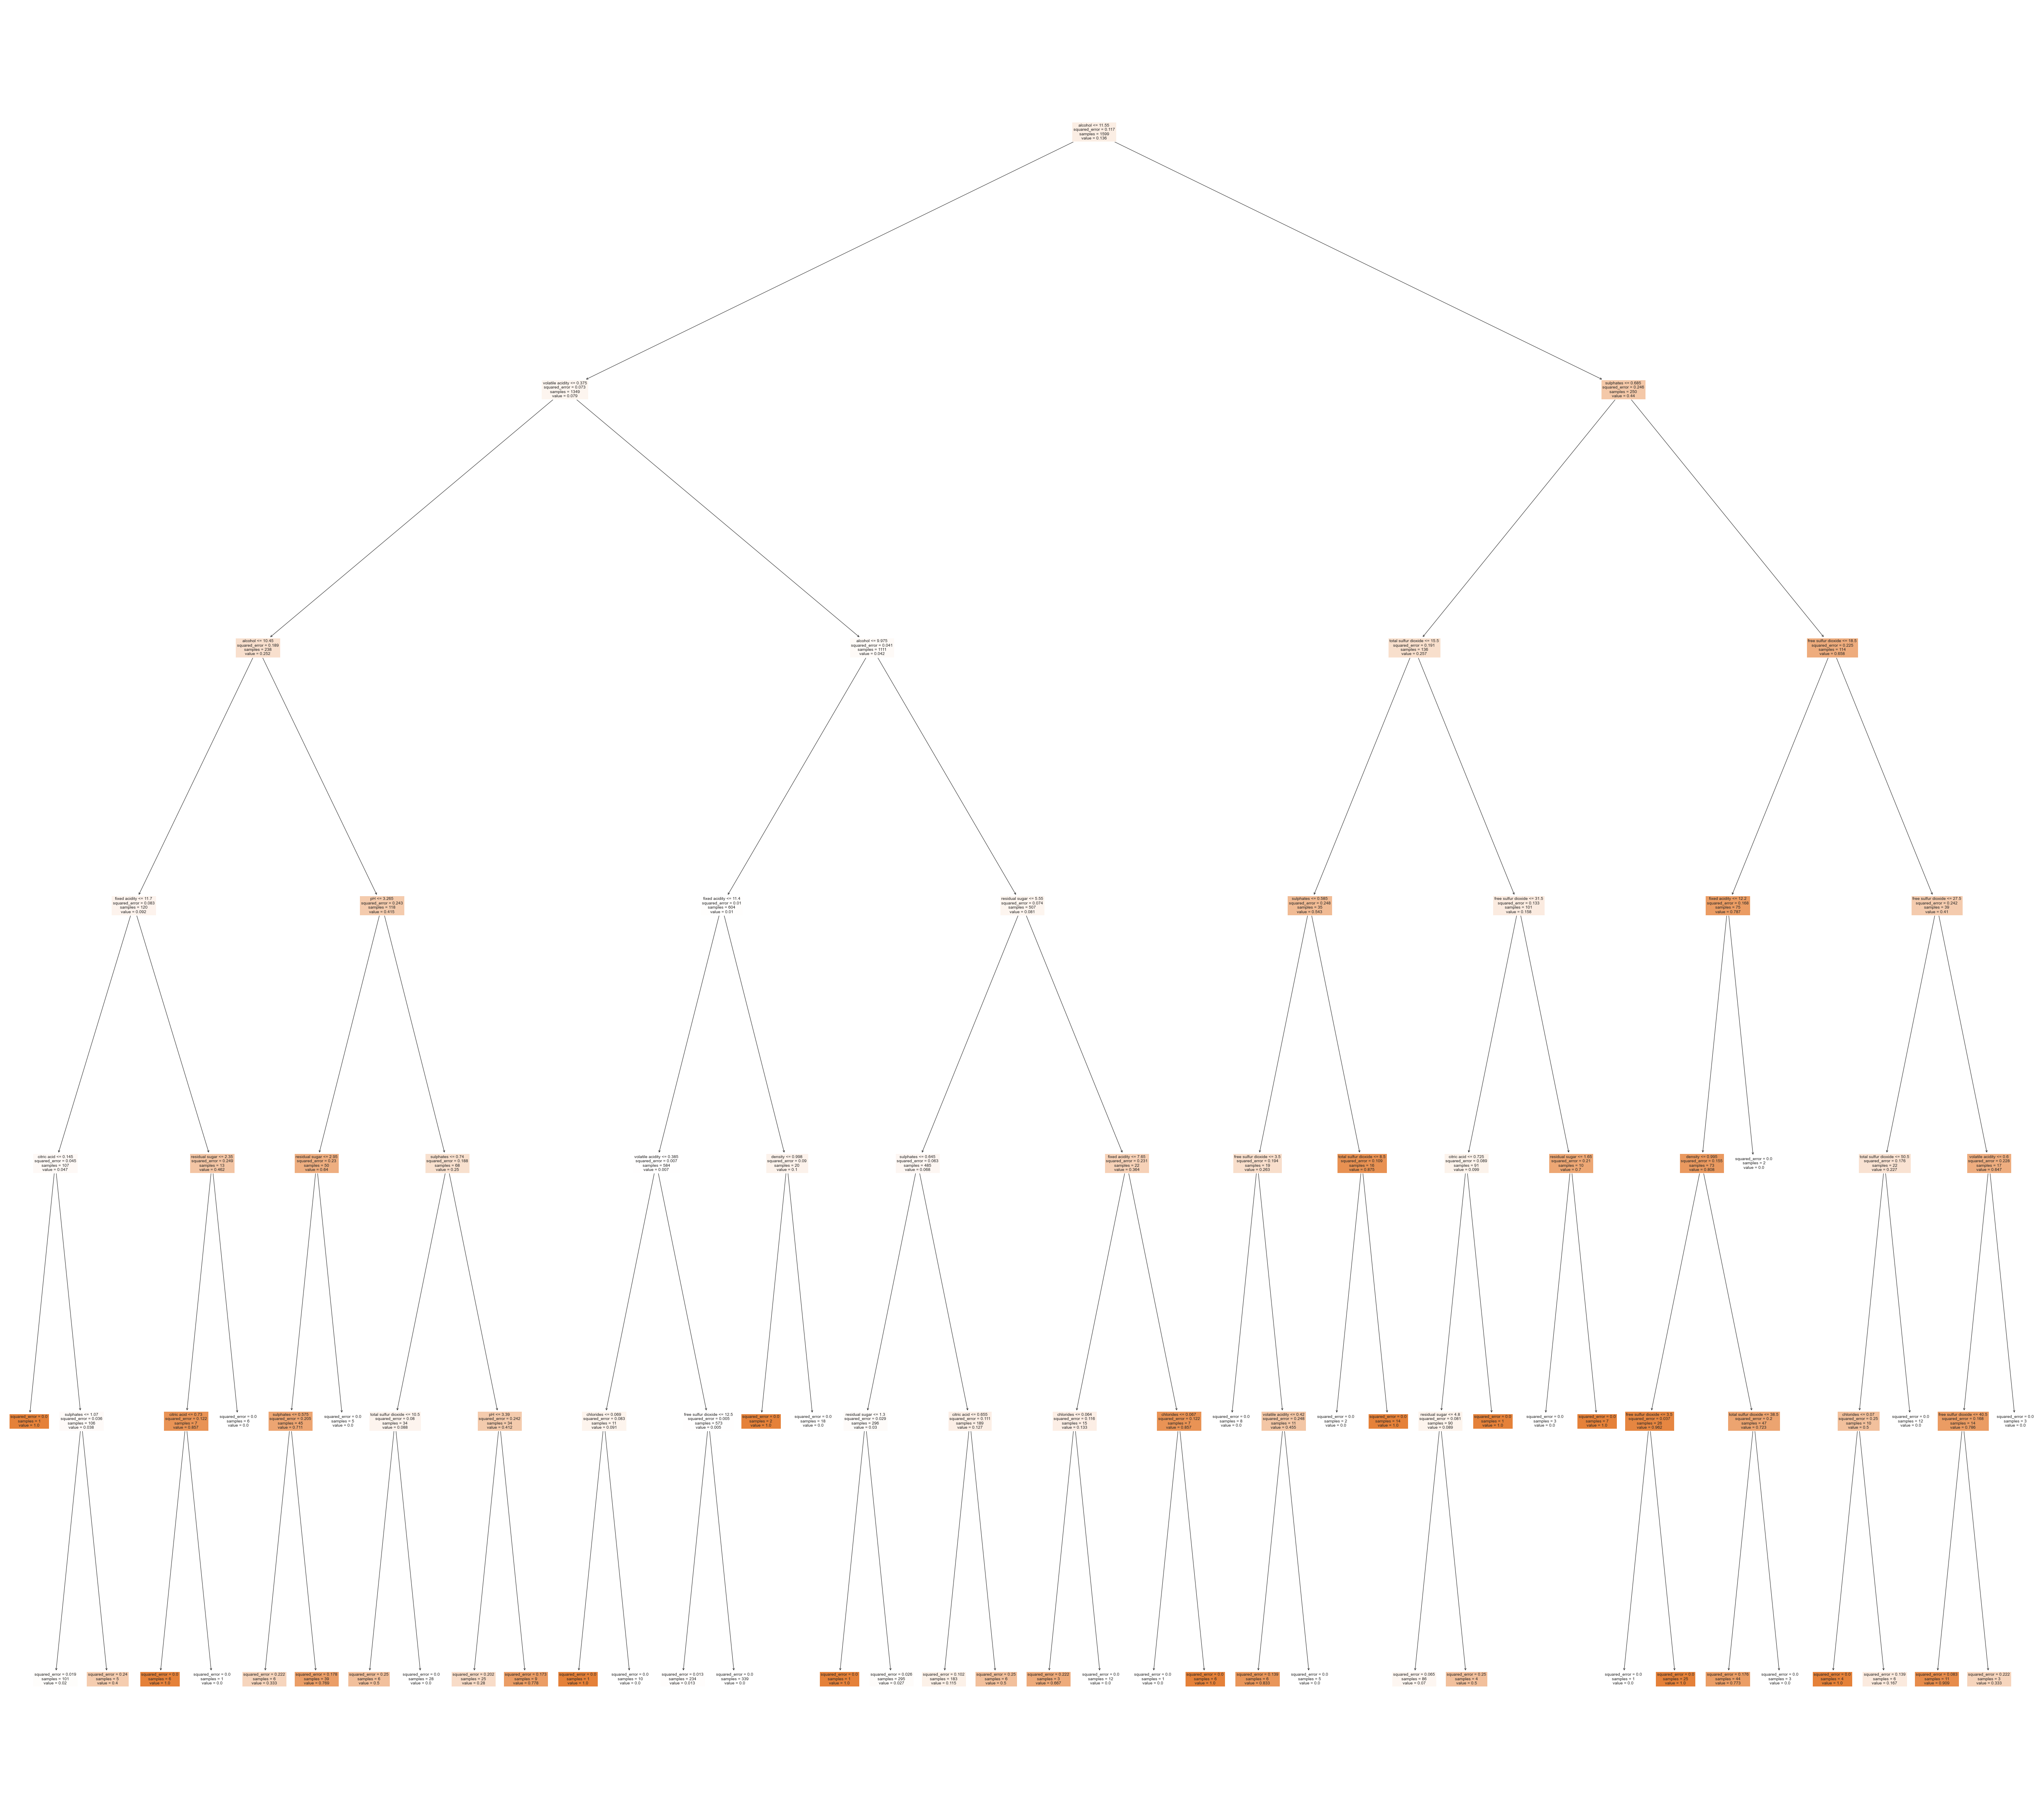

In [385]:
fig = plt.figure(figsize=(88,80))
_ = tree.plot_tree(regr, feature_names=list(X.columns), filled=True) 

In [386]:
importances = dtc.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

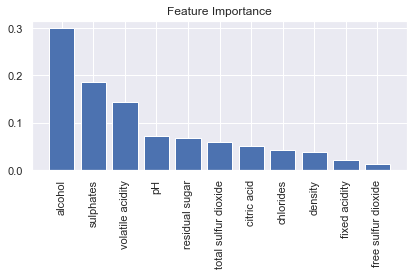

In [387]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## $\color{blue}{\text{RANDOM FOREST}}$

In [388]:
#Random Forest Classifierr
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train.ravel())
 
predictions_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test,predictions_rf)
print(acc_rf)

print(confusion_matrix(y_test,predictions_rf))

0.90625
[[406   9]
 [ 36  29]]


In [389]:
# train the model on train set
#tied for first in f-1 score and higher precision
rf.fit(X_train, y_train) 
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.76      0.45      0.56        65

    accuracy                           0.91       480
   macro avg       0.84      0.71      0.76       480
weighted avg       0.90      0.91      0.90       480



In [390]:
y_pred = rf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9062


In [391]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8499


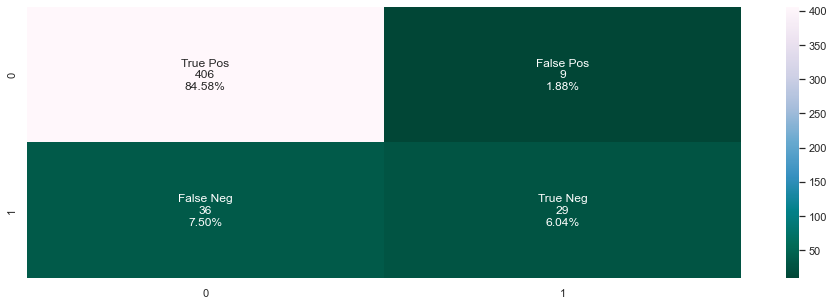

In [392]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_rf)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='PuBuGn_r');

In [393]:
#RF + CV
#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_rf = cross_val_score(rf, X, y, cv=10)
print(cv_scores_rf)
print('cv_scores mean:{}'.format(np.mean(cv_scores_rf)))

[0.875      0.89375    0.84375    0.8625     0.8875     0.85625
 0.8375     0.88125    0.8875     0.89308176]
cv_scores mean:0.8718081761006289


In [394]:
#Apply cross validation to evaluate the results.
scores=cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)
scores

array([0.90625   , 0.91964286, 0.92857143, 0.89732143, 0.88789238])

In [395]:
#Calculate the mean and the standard deviation of the validation
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 0.91 ; Standard Dev.: 0.01)


In [396]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
...
# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

In [397]:
regr = DecisionTreeRegressor(max_depth=6, random_state=None) 
model = regr.fit(X, y)

In [398]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_10 <= 11.55
|   |--- feature_1 <= 0.38
|   |   |--- feature_10 <= 10.45
|   |   |   |--- feature_0 <= 11.70
|   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |--- feature_9 <= 1.07
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- feature_9 >  1.07
|   |   |   |   |   |   |--- value: [0.40]
|   |   |   |--- feature_0 >  11.70
|   |   |   |   |--- feature_3 <= 2.35
|   |   |   |   |   |--- feature_10 <= 8.80
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_10 >  8.80
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_3 >  2.35
|   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_10 >  10.45
|   |   |   |--- feature_8 <= 3.26
|   |   |   |   |--- feature_3 <= 2.95
|   |   |   |   |   |--- feature_9 <= 0.57
|   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |--- feature_9 >  0.57
|   |   |   |   |   |   |--

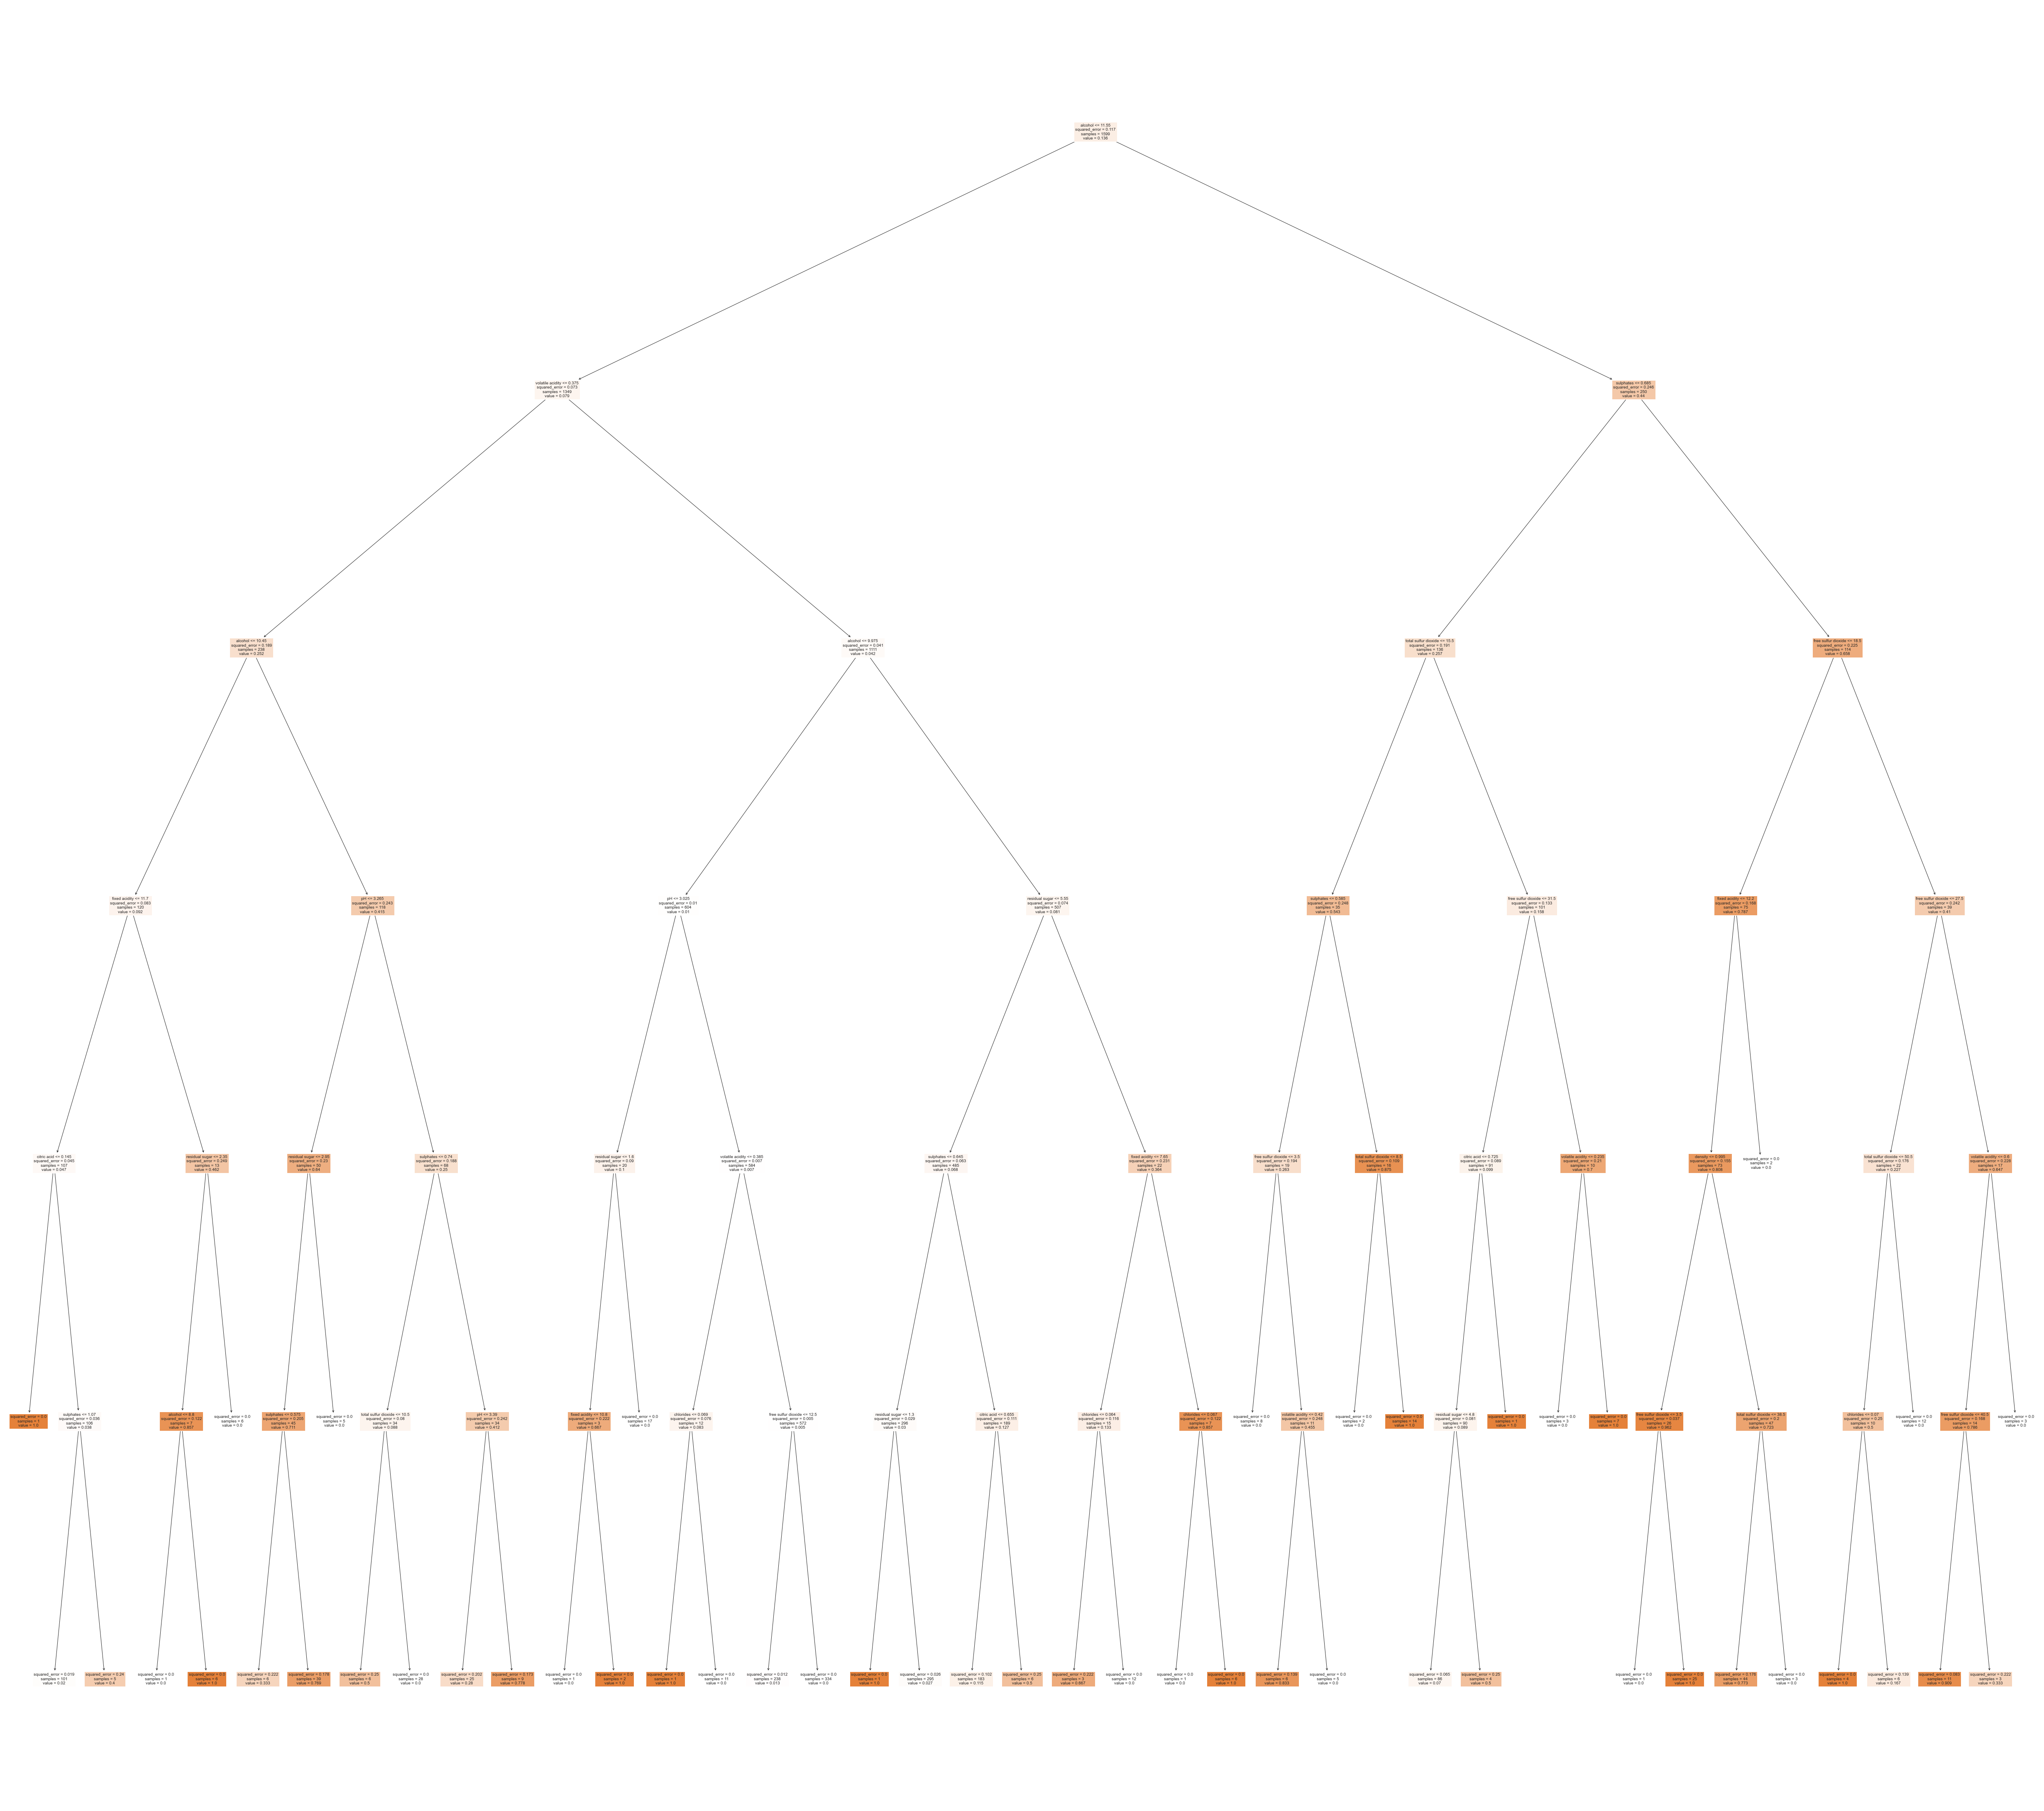

In [399]:
fig = plt.figure(figsize=(88,80))
_ = tree.plot_tree(regr, feature_names=list(X.columns), filled=True) 

In [400]:
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices1 = np.argsort(importances)[::-1]

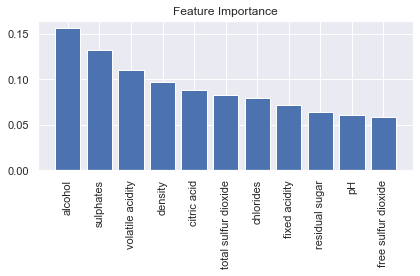

In [401]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices1], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices1], rotation=90)
plt.tight_layout()
plt.show()

In [402]:
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0  
5      9.4        0  
6      9.4        0  
7     10.0        1  
8      9.5        1  
9     10.5        0

In [403]:
#define new observation
# it got it right!
new = [6.7,.032,.044,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.60]
test = [7.3,.65, 0, 1.2,.065, 15.0,21.0,.9946,3.39,0.47,10.0]
#predict which class the new observation belongs to
rf.predict([test])

array([1])

##  $\color{blue}{\text{LOGISTIC REGRESSION}}$

In [404]:
reg = LogisticRegression() 
lr = reg.fit(X_train,y_train) 

In [405]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [406]:
#accuracy level is not bad
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.88
Accuracy in Test  Group   : 0.88


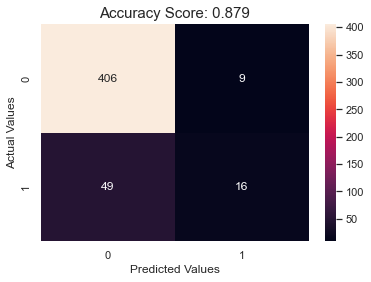

In [407]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [408]:
pred_test  = lr.predict(X_test)
pred_train = lr.predict(X_train)

In [409]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,pred_test)
cm

array([[406,   9],
       [ 49,  16]], dtype=int64)

#### $\color{purple}{\text{PERFORMACE MEASUREMENTS}}$

In [410]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [411]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[940  27]
 [110  42]]
Confusion Matrix Test Data
----------------------------------------
[[406   9]
 [ 49  16]]


In [412]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 406
(Total) True Positive       : 16
(Total) Negative Positive   : 9
(Total) Negative Negative   : 49


In [413]:
#FALSE POSITIVE PLUS FALSE NEGATIVE
FP+FN 

58

In [414]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))
#print("Accuracy Score of Our Model     : ",  accuracy_score(y_test, pred_test)) # same 

Accuracy Score of Our Model     :  0.8791666666666667


In [415]:
Error_Rate = 1- (accuracy_score(y_test, pred_test))  
Error_Rate

0.12083333333333335

In [416]:
from sklearn.metrics import recall_score

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

recall_score()            :  0.8791666666666667


In [417]:
#Out of all the predicted positive instances, how many were predicted correctly = TP / (TP + FP=
from sklearn.metrics import precision_score

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

precision_score()         :  0.8791666666666667


In [418]:
print(" Specificity Score   : ",  (TN)/(TN + FP)) 

 Specificity Score   :  0.9783132530120482


In [419]:
#f-1 score is very high. we should defn use this model. Actually it is only high for bad wines....the same issue
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
#print("F1_score     : ",  f1_score(y_test, pred_test,average='micro')) #By formula

F1_score     :  0.8791666666666667


In [420]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("f1_score        : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score    : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrics =  precision_recall_fscore_support(y_test, pred_test)
print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 
print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       415
           1       0.64      0.25      0.36        65

    accuracy                           0.88       480
   macro avg       0.77      0.61      0.64       480
weighted avg       0.86      0.88      0.86       480

f1_score        : 0.88
recall_score    : 0.88
precision_score : 0.88


Precision       : [0.89230769 0.64      ]
F1 Score        : [0.93333333 0.35555556]


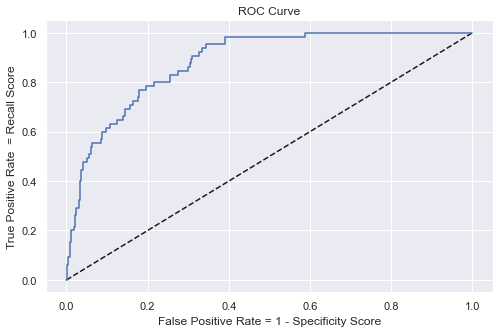

In [421]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

 ## $\color{blue}{\text{QDA}}$

In [422]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())
predictions_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_test,predictions_qda)
print(acc_qda)
print(confusion_matrix(y_test,predictions_qda))

0.8520833333333333
[[375  40]
 [ 31  34]]


In [423]:
# train the model on train set
qda.fit(X_train, y_train) 
print(classification_report(y_test, predictions_qda))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       415
           1       0.46      0.52      0.49        65

    accuracy                           0.85       480
   macro avg       0.69      0.71      0.70       480
weighted avg       0.86      0.85      0.86       480



In [424]:
y_pred = qda.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8521


In [425]:
y_pred_train = qda.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8722


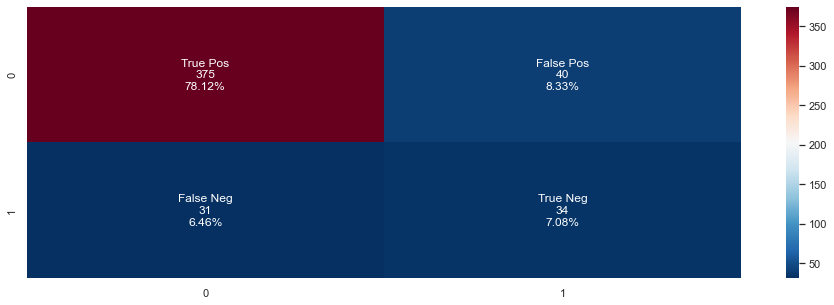

In [426]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions_qda)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='RdBu_r');

In [427]:
#QDA + CV
#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_qda = cross_val_score(qda, X, y, cv=10)
print(cv_scores_qda)
print('cv_scores mean:{}'.format(np.mean(cv_scores_qda)))

[0.88125   0.8625    0.775     0.76875   0.91875   0.84375   0.725
 0.75625   0.89375   0.8427673]
cv_scores mean:0.8267767295597483


In [428]:
5#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

nan


In [429]:
#mean of all the features of the bad wine- want to test this so we will choose numbers similar
data_pivot_table_mean.iloc[1].to_numpy()

array([11.6    ,  0.073  ,  0.4    ,  0.99572,  8.7    , 11.     ,
        3.27   ,  2.3    ,  0.74   , 27.     ,  0.37   ])

In [430]:
#define new observation
# it got it right!
new = [11.6,.073,.04,.995,8.7,11,3.27,2.3,.74,.27,.37]

#predict which class the new observation belongs to
qda.predict([new])



array([1])

 ## $\color{blue}{\text{TESTING THE MODEL WITH ALENTEJO WINE}}$

In [441]:
df_analysis = data[['alcohol','volatile acidity', 'total sulfur dioxide','pH','quality']].copy()

In [442]:
df_analysis.head()

alcohol  volatile acidity  total sulfur dioxide    pH  quality
0      9.4              0.70                  34.0  3.51        0
1      9.8              0.88                  67.0  3.20        0
2      9.8              0.76                  54.0  3.26        0
3      9.8              0.28                  60.0  3.16        0
4      9.4              0.70                  34.0  3.51        0

In [443]:
#Split the data
X1 = df_analysis.drop(['quality'], axis = 1)
y1 = df_analysis['quality']

In [444]:
X1.shape

(1599, 4)

In [445]:
#random_state #42
#stratify the data because very unbalanced
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1599)

In [446]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train1, y_train1)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='quality'>

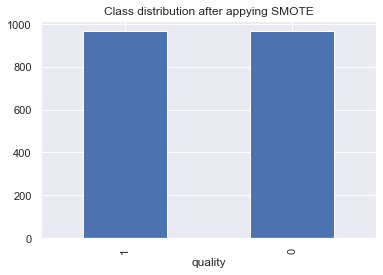

In [447]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='quality')

In [448]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf1.fit(X_train1, y_train1.ravel())
 
predictions_rf1 = rf1.predict(X_test1)
acc_rf1 = accuracy_score(y_test1,predictions_rf1)
print(acc_rf1)

print(confusion_matrix(y_test1,predictions_rf1))

0.90625
[[406   9]
 [ 36  29]]


In [449]:
rf.fit(X_train, y_train) 
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.76      0.45      0.56        65

    accuracy                           0.91       480
   macro avg       0.84      0.71      0.76       480
weighted avg       0.90      0.91      0.90       480



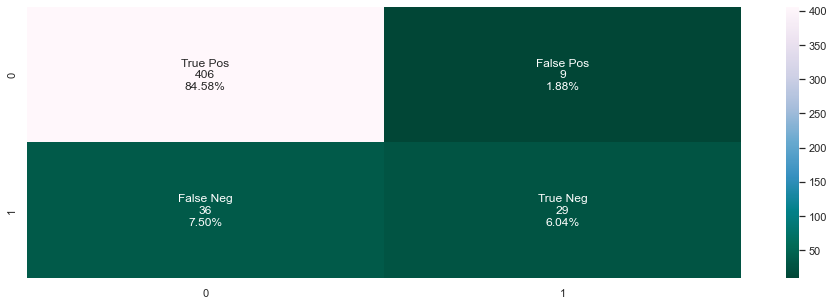

In [450]:
cgroup_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test1,predictions_rf1)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='PuBuGn_r');

In [451]:
#RF + CV
#train model k fold = 5 produced less accuracy, therefore chose k=10
cv_scores_rf1 = cross_val_score(rf1, X1, y1, cv=10)
print(cv_scores_rf1)
print('cv_scores mean:{}'.format(np.mean(cv_scores_rf1)))

[0.875     0.88125   0.85      0.85      0.9       0.88125   0.7875
 0.825     0.88125   0.8490566]
cv_scores mean:0.8580306603773584


In [452]:
#Apply cross validation to evaluate the results.
scores1=cross_val_score(rf1,X_train1,y_train1.values.ravel(),cv=10)
scores1

array([0.91071429, 0.89285714, 0.90178571, 0.9375    , 0.94642857,
       0.91071429, 0.85714286, 0.92857143, 0.89285714, 0.91891892])

In [453]:
#Calculate the mean and the standard deviation of the validation
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores1.mean(), scores1.std()))

Mean: 0.91 ; Standard Dev.: 0.02)


In [454]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
...
# prepare the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

In [456]:
regr1 = DecisionTreeRegressor(max_depth=6, random_state=None) 
model = regr1.fit(X, y)

In [457]:
text_representation1 = tree.export_text(regr1) 
print(text_representation1)

|--- feature_10 <= 11.55
|   |--- feature_1 <= 0.38
|   |   |--- feature_10 <= 10.45
|   |   |   |--- feature_0 <= 11.70
|   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |--- feature_9 <= 1.07
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- feature_9 >  1.07
|   |   |   |   |   |   |--- value: [0.40]
|   |   |   |--- feature_0 >  11.70
|   |   |   |   |--- feature_3 <= 2.35
|   |   |   |   |   |--- feature_10 <= 8.80
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_10 >  8.80
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_3 >  2.35
|   |   |   |   |   |--- value: [0.00]
|   |   |--- feature_10 >  10.45
|   |   |   |--- feature_8 <= 3.26
|   |   |   |   |--- feature_3 <= 2.95
|   |   |   |   |   |--- feature_9 <= 0.57
|   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |--- feature_9 >  0.57
|   |   |   |   |   |   |--

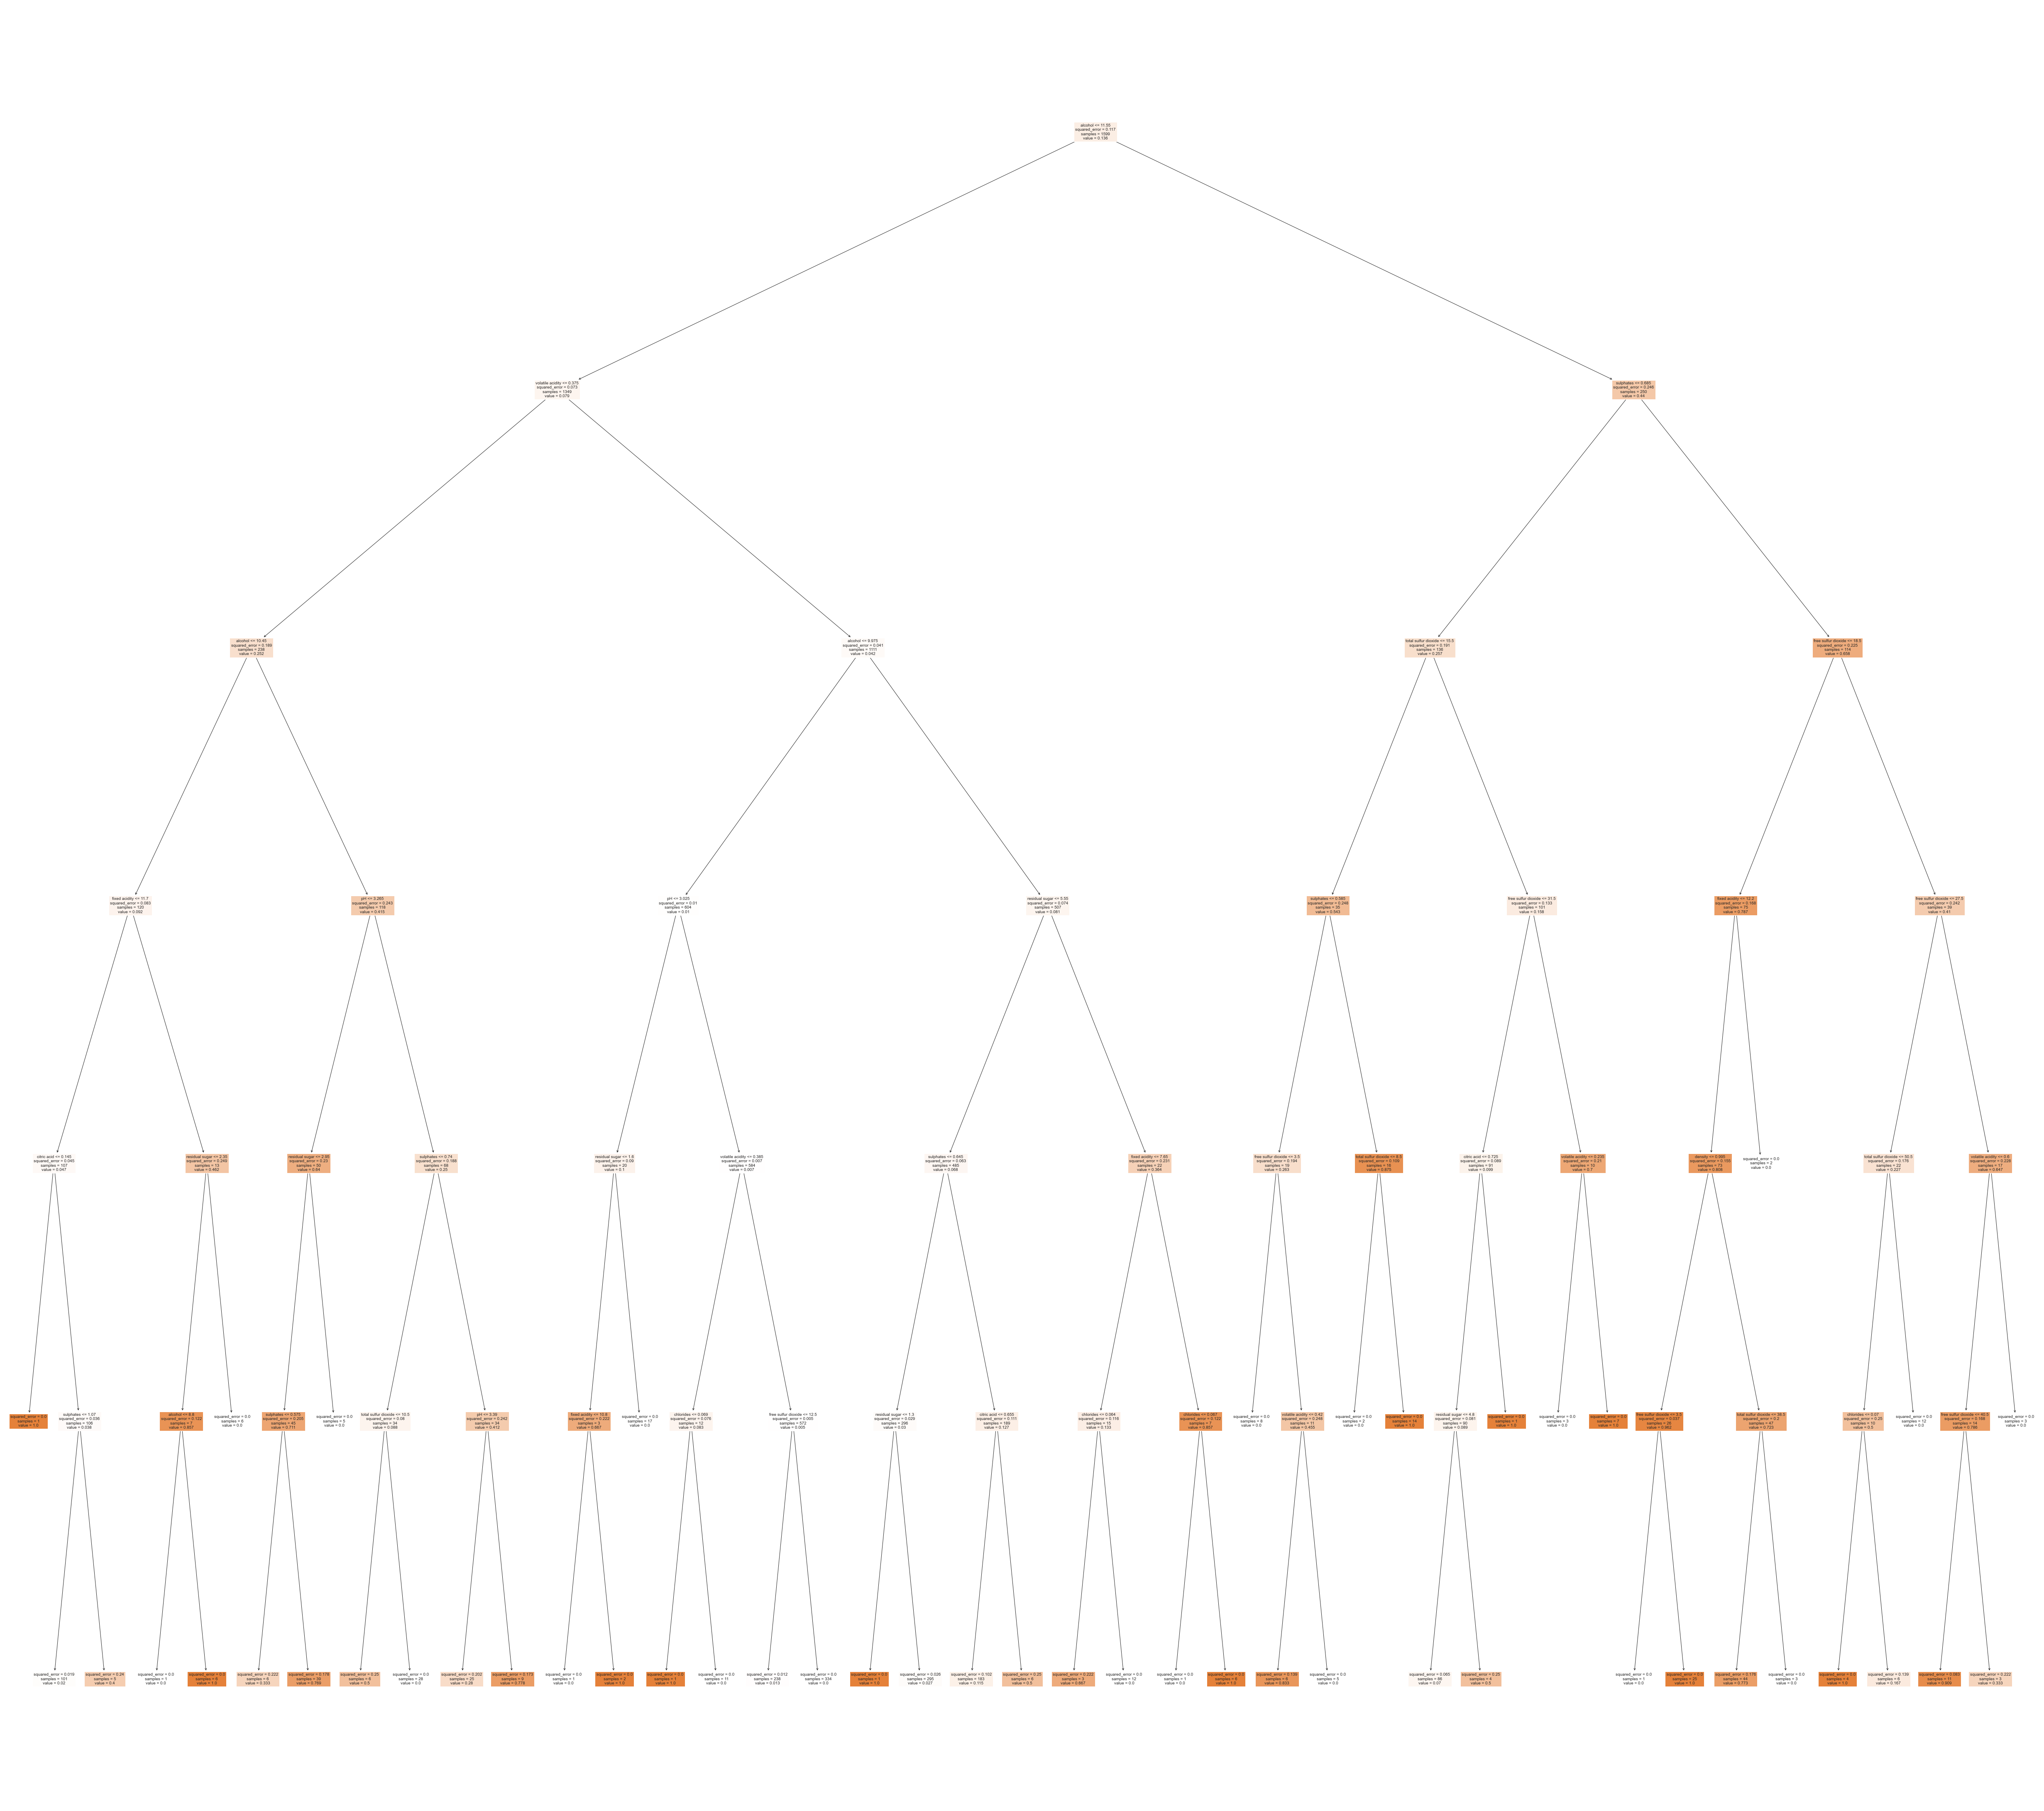

In [458]:
fig = plt.figure(figsize=(88,80))
_ = tree.plot_tree(regr1, feature_names=list(X.columns), filled=True) 

In [459]:
#Created a mini df from vinho do alentejo
data_alentejo = pd.read_csv("C:/Users/faria/OneDrive/Desktop/Final Projeto Ana/Alentejo_Tinto.csv")
data_alentejo.head() 

Sample   Alcohol   Volatile Acidity  Total Sufur Dioxide    Ph
0   79034     17.94               0.46                   94  3.48
1   79780     14.20               0.58                   96  3.80
2   79779     15.00               0.43                   74  3.52
3   77761     14.10               0.58                   69  3.71

In [275]:
#define new observation. The model perform poorly for good wines- classifing correctly only .33%

new = [11.60,34.0,.32,3.29]  #this is a "good wine" from the original dataset but was not classified correctly
test = [17.94,0.46,94, 3.48]  # this one was correctly classified
test_al = [15.0,0.43,74, 3.52] #this was falsely classified
test_al2 = [14.20,0.58,96,3.80] #false
test_al3 = [14.10, 0.58, 69, 3.71] #false
test_7 = [10,.65,21,3.39] #this was correctly classified

#predict which class the new observation belongs to
rf1.predict([test_al3])

array([0])

 ## $\color{blue}{\text{CONCLUSION}}$

 ##### $\color{black}{\text{In the end, it was clear that the Vinho Verde tinto quality dataset was highly unbalanced.  Because of this is was difficult to build a model that had a high F-1 score.  We attempted to use the SMOTE, but it did not increase the f-1 score or recall score by much.  We then created a small dataset from alentejo wines to see if thE most accuracy (Random Forest) model would accurately classify the wines.  As you can see it only classified about 33% correct wrt to the points that we ran. }}$